# ML Zero to Hero: Fashion MNIST
I want to rebuild my confidence in programming and finally get started on my ML project. This is the second mini-project on my path to building really cool stuff.

This mini-project is literally stolen from the ["Train your first neural network: basic classification."](https://www.tensorflow.org/beta/tutorials/keras/basic_classification)

In [3]:
!pip install -q tensorflow==2.0.0-beta1

     |████████████████████████████████| 87.9MB 1.2MB/s 
     |████████████████████████████████| 501kB 43.2MB/s 
     |████████████████████████████████| 3.1MB 34.6MB/s 


In [0]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Load the fashion MNIST dataset
fashion_mnist = keras.datasets.fashion_mnist

# Separate the dataset into training and test data
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

4423680/4422102 [==============================] - 0s 0us/step


| Label | Class       |
|-------|-------------|
| 0     | T-shirt/top |
| 1     | Trouser     |
| 2     | Pullover    |
| 3     | Dress       |
| 4     | Coat        |
| 5     | Sandal      |
| 6     | Shirt       |
| 7     | Sneaker     |
| 8     | Bag         |
| 9     | Ankle boot  |

In [6]:
# Should be 60,000 training images, width of 28, height of 28
train_images.shape

(60000, 28, 28)

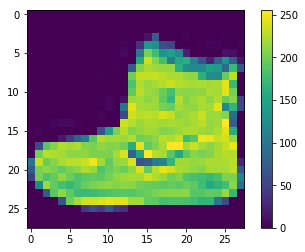

In [7]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

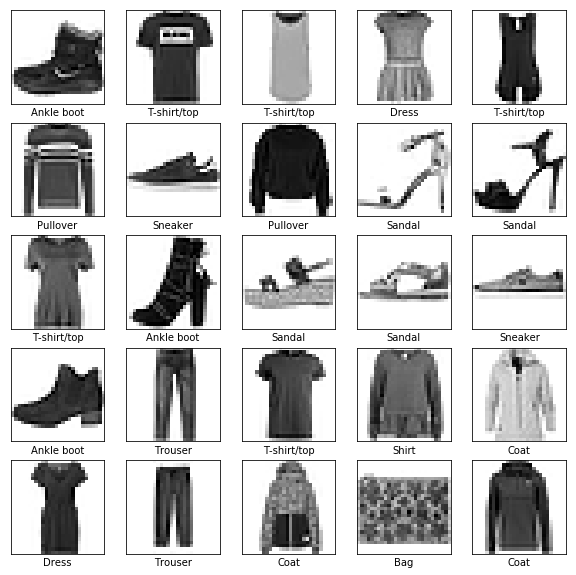

In [8]:
# Preprocessing to normalize the data between 0 and 1
train_images = train_images / 255.0

test_images = test_images / 255.0

# Verify that the data isn't actually garbage
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [9]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

W0722 01:04:26.409998 140584133429120 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [11]:
model.fit(train_images, train_labels, epochs=20)

Epoch 1/20
60000/60000 [==============================] - 5s 89us/sample - loss: 0.4976 - acc: 0.8263
Epoch 2/20
60000/60000 [==============================] - 5s 80us/sample - loss: 0.3753 - acc: 0.8639
Epoch 3/20
60000/60000 [==============================] - 5s 79us/sample - loss: 0.3360 - acc: 0.8776
Epoch 4/20
60000/60000 [==============================] - 5s 79us/sample - loss: 0.3122 - acc: 0.8845
Epoch 5/20
60000/60000 [==============================] - 5s 79us/sample - loss: 0.2934 - acc: 0.8924
Epoch 6/20
60000/60000 [==============================] - 5s 81us/sample - loss: 0.2786 - acc: 0.8976
Epoch 7/20
60000/60000 [==============================] - 5s 82us/sample - loss: 0.2671 - acc: 0.9005
Epoch 8/20
60000/60000 [==============================] - 4s 69us/sample - loss: 0.2539 - acc: 0.9053
Epoch 9/20
60000/60000 [==============================] - 4s 69us/sample - loss: 0.2474 - acc: 0.9069
Epoch 10/20
60000/60000 [==============================] - 4s 70us/sample - loss: 

In [13]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print(f'\nTest accuracy: {test_acc}')

10000/10000 [==============================] - 0s 38us/sample - loss: 0.3541 - acc: 0.8892

Test accuracy: 0.88919997215271


In [0]:
predictions = model.predict(test_images)

In [19]:
# Highest confidence value
print(f'Predicted: {np.argmax(predictions[0])}\nActual: {test_labels[0]}')

Predicted: 9
Actual: 9


In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

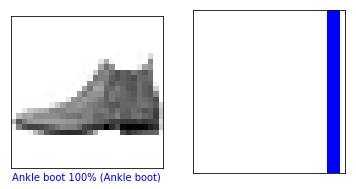

In [21]:
# Look at first image and see probabilities
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

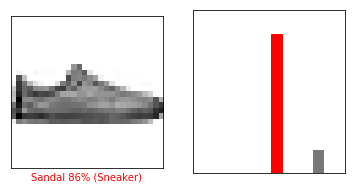

In [22]:
# Look at 13th image and see prediction probabilities
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

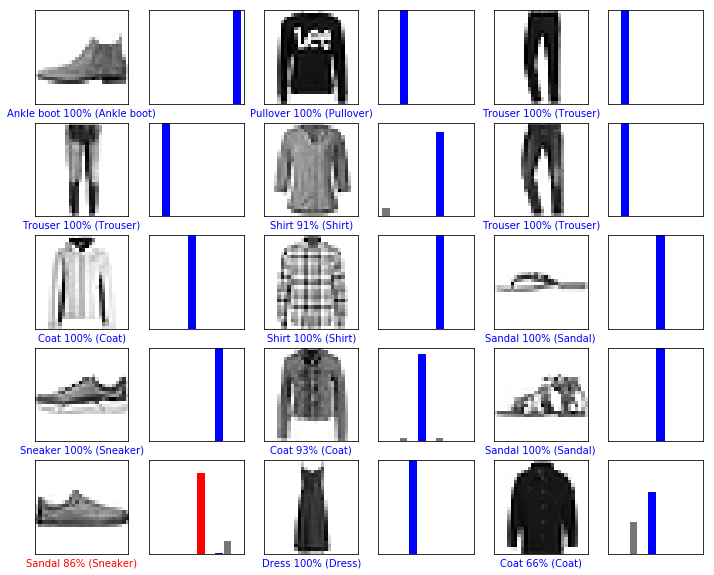

In [23]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

(28, 28)
(1, 28, 28)
[[8.2969638e-12 1.0200448e-13 2.7328265e-11 1.5882991e-14 7.3730213e-14
  8.5757420e-06 2.9416414e-11 3.0659893e-04 4.6000620e-10 9.9968481e-01]]


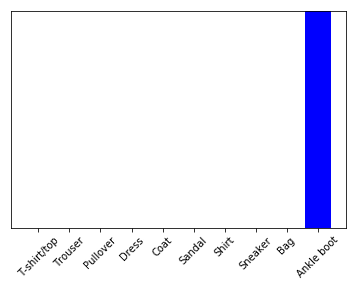

In [24]:
# Grab an image from the test dataset.
img = test_images[0]

print(img.shape)

# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

predictions_single = model.predict(img)

print(predictions_single)

plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)